# Week 3:  
## More Interactive Data Viz & Intro to geospatial data

Sep 12 & Sep 19

## Housekeeping

- [Homework #1](https://github.com/musa-550-fall-2024/assignment1) due on Thursday, 9/19

## RECAP!!! : What have we learned so far

#### Matplotlib

- The classic, most flexible library
- Can handle geographic data well
- Overly verbose syntax, syntax is not declarative 


#### Pandas

- Quick, built-in interface
- Not as many features as other libraries

#### Seaborn

- Best for visualizing complex relationships between variables
- Improves matplotlib's syntax: more declarative

#### Altair

- Easy, declarative syntax
- Lots of interactive features
- Complex visualizations with minimal amounts of code

### We'll learn one more today...

<center>
    <img src="imgs/dataviz-landscape-2.png" width=600></img>
</center>

### HoloViz: A set of coordinated visualization libraries in Python

<center>
    <a href=https://holoviz.org/>
        <img src="imgs/holoviz-logo.png" width=200></img>
    </a>
</center>

### The motivation behind HoloViz mirrors the goals of this course

Proper data visualization is crucial throughout all of the steps of the data science pipeline: data wrangling, modeling, and storytelling

<img src="imgs/holoviz-framework.png" width=800></img>

<center>
    <img src="imgs/holoviz-packages.png" width=700></img>
</center>

### Today: `hvPlot`, `Holoviews`, `Geoviews`

### Later in the course: `Datashader`, `Param`, `Panel`

### HoloViz: A quick overview

- **Bokeh**: creating interactive visualizations using Javascript using Python
- **HoloViews**: a declarative, high-level library for creating bokeh visualizations

**Note:** The relationship between Bokeh and Holoviews is similar to Altair and Vega

#### A significant pro

GeoViews builds on HoloViews to add support for geographic data

#### The major cons

- All are relatively new
- Bokeh is the most well-tested
- HoloViews, GeoViews, hvPlot are being actively developed but are very promising

### How does `hvPlot` fit in?


High-level visualization library designed to help you quickly create **interactive charts** during your data wrangling

**Main uses:**
- Quickly generate interactive plots from your data
- Seamlessly handles pandas and geopandas data
- Relies on Holoviews and Geoviews under the hood

It provides an interface just like the `pandas` plot() function, but **much** more useful.

### Example: let's return to the measles dataset

In [1]:
# Our usual imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Let's load the measles data from week 2

# Note we are using a relative path
path = "./data/measles_incidence.csv"

# Skip first two rows and convert "-" to NaN automatically
measles_data_raw = pd.read_csv(path, skiprows=2, na_values="-")

measles_data_raw.head(n=10)

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.40,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.20,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.20,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.40,6.70,NaN,18.83,7.37,2.91,0.91
5,1928,6,7.27,NaN,6.40,26.58,2.79,8.09,17.76,3.43,...,2.04,12.54,3.44,0.60,1.12,NaN,17.73,5.01,3.25,10.45
6,1928,7,10.00,NaN,0.95,32.76,2.73,3.94,20.16,4.29,...,3.07,17.42,2.08,0.20,1.68,NaN,17.92,6.96,1.61,6.82
7,1928,8,13.83,NaN,1.66,36.44,2.83,4.34,22.70,1.72,...,4.09,18.06,2.34,0.60,1.12,NaN,17.99,7.02,2.74,NaN
8,1928,9,11.06,NaN,0.95,33.89,3.84,2.96,22.70,3.43,...,5.69,7.66,11.82,0.20,5.87,NaN,23.40,5.13,3.04,4.55
9,1928,10,13.98,NaN,4.03,29.18,5.31,4.04,23.91,4.29,...,2.92,12.88,7.74,0.79,13.13,NaN,19.86,11.62,4.11,50.00


In [3]:
measles_data_raw.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


#### Convert from wide to long formats...

In [4]:
measles_data = measles_data_raw.melt(
    id_vars=["YEAR", "WEEK"], value_name="incidence", var_name="state"
)

In [5]:
measles_data.head()

,YEAR,WEEK,state,incidence
0,1928,1,ALABAMA,3.67
1,1928,2,ALABAMA,6.25
2,1928,3,ALABAMA,7.95
3,1928,4,ALABAMA,12.58
4,1928,5,ALABAMA,8.03


#### Reminder: plotting with `pandas` 

The default `.plot()` doesn't know which variables to plot.

<Axes: >

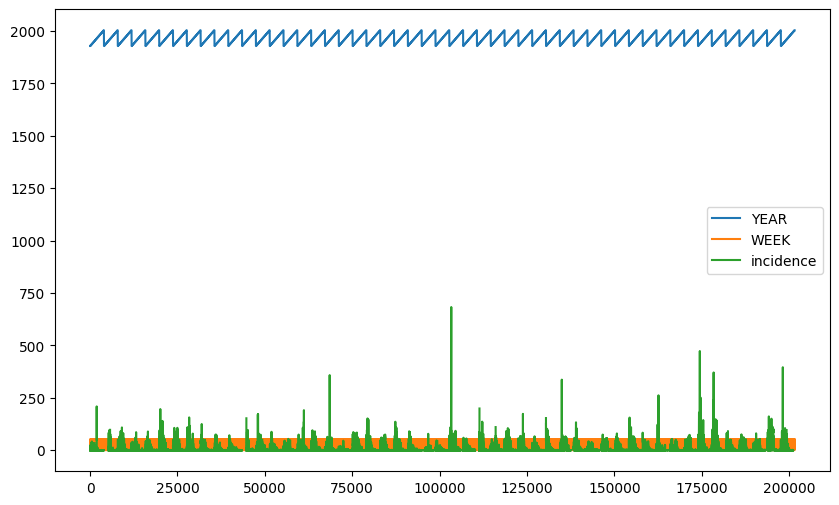

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
measles_data.plot(ax=ax)

But we can group by the year, and plot the national average each year

In [8]:
by_year = measles_data.groupby("YEAR", as_index=False)["incidence"].sum()
by_year.head()

,YEAR,incidence
0,1928,16924.34
1,1929,12060.96
2,1930,14575.11
3,1931,15427.67
4,1932,14481.11


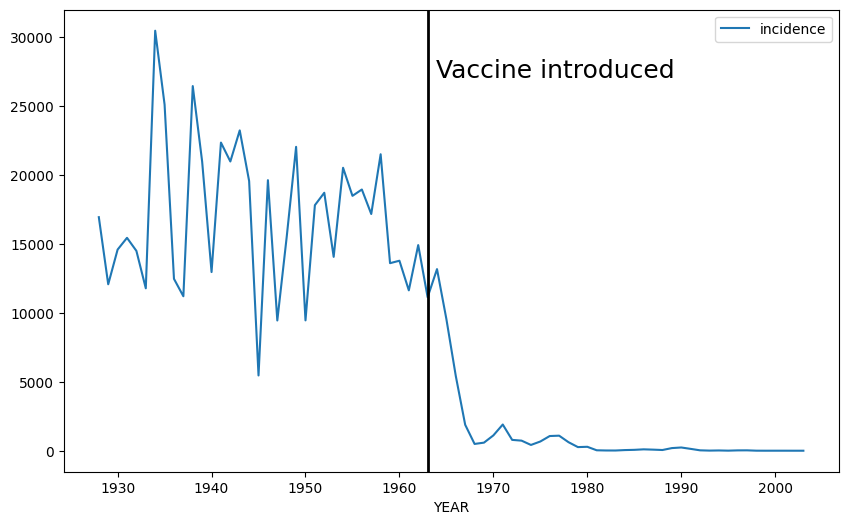

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the annual average by year
by_year.plot(x='YEAR', y='incidence', ax=ax)

# Add the vaccine year and label
ax.axvline(x=1963, c='k', linewidth=2)
ax.text(1963, 27000, " Vaccine introduced", ha='left', fontsize=18);

#### Adding interactivity with `hvplot`

Use the `.hvplot()` function to create interactive plots.

In [10]:
# This will add the .hvplot() function to your DataFrame!
# Import holoviews too
import holoviews as hv
import hvplot.pandas

# Load bokeh
hv.extension("bokeh")

In [11]:
img = by_year.hvplot(x='YEAR', y='incidence', kind='line', width=600, height=400)
img

:Curve   [YEAR]   (incidence)

In [46]:
by_year

,YEAR,incidence
0,1928,16924.34
1,1929,12060.96
2,1930,14575.11
3,1931,15427.67
4,1932,14481.11
...,...,...
71,1999,0.92
72,2000,1.65
73,2001,1.54
74,2002,0.31


In this case, `.hvplot()` creates a `Holoviews` `Curve` object.

Not unlike `altair` `Chart` objects, it's an object that knows how to translate from your DataFrame data to a visualization.

#### Many different chart types are available...

In [12]:
by_year.hvplot(x="YEAR", y="incidence", kind="scatter")

:Scatter   [YEAR]   (incidence)

In [18]:
by_year.hvplot(x='YEAR', y='incidence', kind="bar", rot=90, width=1000)

:Bars   [YEAR]   (incidence)

#### Just like in altair, we can also layer chart elements together

Use the `*` operator to layer together chart elements.

**Note:** the same thing can be accomplished in altair, but with the `+` operator. 

In [13]:
# The line chart of incidence vs year
incidence = by_year.hvplot(x='YEAR', y='incidence', kind="line")

# Vertical line + label for vaccine year
vline = hv.VLine(1963).opts(color="black")
label = hv.Text(1963, 27000, " Vaccine introduced", halign="left")

final_chart = incidence * vline * label
final_chart

:Overlay
   .Curve.I :Curve   [YEAR]   (incidence)
   .VLine.I :VLine   [x,y]
   .Text.I  :Text   [x,y]

#### We can group charts by a specific column, with automatic widget selectors

This is some *powerful magic.*

Let's calculate the annual measles incidence for each year and state:

In [14]:
by_state = measles_data.groupby(["YEAR", "state"], as_index=False)["incidence"].sum()

by_state.head()

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1928,ALASKA,0.00
2,1928,ARIZONA,200.75
3,1928,ARKANSAS,481.77
4,1928,CALIFORNIA,69.22


Now, tell `hvplot` to plot produce a chart of incidence over time for each state:

In [15]:
by_state_chart = by_state.hvplot(
    x="YEAR", y="incidence", groupby="state", width=400, kind="line"
)

by_state_chart

:DynamicMap   [state]
   :Curve   [YEAR]   (incidence)

#### We can select out individual charts from the set of grouped objects

Use the dict-like selection syntax: `[key]`

In [16]:
PA = by_state_chart["PENNSYLVANIA"].relabel("PA") # .relabel() is optional — it just changes the title
NJ = by_state_chart["NEW JERSEY"].relabel("NJ")

#### Combine charts as subplots with the `+` operator

In [17]:
combined = PA + NJ

combined

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

In [18]:
print(combined)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)


The charts are side-by-side by default. You can also specify the number of rows/columns explicitly.

In [19]:
# one column
combined.cols(1)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

#### We can also show overlay lines on the same plot

First, select a subset of states we want to highlight using the `.isin()` function:

In [20]:
states = ["NEW YORK", "NEW JERSEY", "CALIFORNIA", "PENNSYLVANIA"]
sub_states = by_state.loc[ by_state['state'].isin(states) ]

In [21]:
sub_states.head(n=10)

,YEAR,state,incidence
4,1928,CALIFORNIA,69.22
30,1928,NEW JERSEY,797.14
32,1928,NEW YORK,649.97
38,1928,PENNSYLVANIA,583.95
55,1929,CALIFORNIA,72.80
81,1929,NEW JERSEY,181.86
83,1929,NEW YORK,249.09
89,1929,PENNSYLVANIA,489.56
106,1930,CALIFORNIA,760.24
132,1930,NEW JERSEY,602.87


Now, use the **by keyword** to show multiple plots on the same axes:

In [22]:
sub_state_chart = sub_states.hvplot(
    x="YEAR",  # year on x axis
    y="incidence",  # total incidence on y axis
    by="state",  # NEW: multiple states on same axes
    kind="line",
)

sub_state_chart * vline

:Overlay
   .NdOverlay.I :NdOverlay   [state]
      :Curve   [YEAR]   (incidence)
   .VLine.I     :VLine   [x,y]

#### We can also show faceted plots

We can explicitly map variables to rows/columns of our visualization. This is similar to the functionality we saw in altair, when we used the `alt.Chart().facet(column='state')` syntax 

Below, we specify the `state` column should be mapped to each column of the chart:

In [23]:
img = sub_states.reset_index().hvplot(
    x="YEAR",  # year on x axis
    y="incidence",  # total incidence on y axis
    col="state",  # NEW: map the "state" value to each column in the chart
    kind="line",
    rot=90,
    frame_width=200,
)

img * vline

:GridSpace   [state]
   :Overlay
      .Curve.I :Curve   [YEAR]   (incidence)
      .VLine.I :VLine   [x,y]

::: {.callout-note}

Functions for each kind of chart type are available too. Try tab complete on `df.hvplot.` to see the options. You can use these functions directly or use pass the `kind='chart type'` keyword to the `.hvplot()` function.

:::

In [24]:
# Tab complete
by_state.hvplot.scatter?

Signature:
by_state.hvplot.scatter(
    x=None,
    y=None,
    *,
    alpha,
    angle,
    cmap,
    color,
    fill_alpha,
    fill_color,
    hit_dilation,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_dash_offset,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_dash_offset,
    line_join,
    line_width,
    marker,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_dash_offset,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection

#### For example, we could plot a bar chart for these four states

Let's select a subset by *both* year and state:

In [25]:
# Two selections
sel_year = by_state["YEAR"].isin(range(1960, 1970))
sel_state = by_state["state"].isin(states)

# Use the boolean AND operator: &
sel = sel_year & sel_state

# Grouped bar chart for the desired states and years
by_state.loc[sel].hvplot.bar(x="YEAR", y="incidence", by="state", rot=90)

:Bars   [YEAR,state]   (incidence)

Change `bar()` to `line()` and we get the same thing as before.

In [26]:
by_state.loc[sel].hvplot.line(x="YEAR", y="incidence", by="state", rot=90)

:NdOverlay   [state]
   :Curve   [YEAR]   (incidence)

#### Customizing charts

See the help message for explicit hvplot functions:

In [27]:
by_state.hvplot.line?

Signature:
by_state.hvplot.line(
    x=None,
    y=None,
    *,
    alpha,
    color,
    hover_alpha,
    hover_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_dash_offset,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_dash_offset,
    line_join,
    line_width,
    muted,
    muted_alpha,
    muted_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_dash_offset,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection_line_dash_offset,
    nonselection_line_join,
    nonselection_line_width,
    selection_alpha,
    selection_color,
    selection_line_alpha,
    selection_line_cap,
    selection_line_color,
    selection_line_dash,
    selection

### Can we reproduce the WSJ measles heatmap?

Earlier, we reproduced the [WSJ measles heatmap](http://graphics.wsj.com/infectious-diseases-and-vaccines/) using altair....can we do it with hvplot too?

Take a look at the help function for the `.hvplot.heatmap()` function:

In [28]:
measles_data.hvplot.heatmap?

Signature:
measles_data.hvplot.heatmap(
    x=None,
    y=None,
    C=None,
    colorbar=True,
    *,
    alpha,
    annular_alpha,
    annular_color,
    annular_fill_alpha,
    annular_fill_color,
    annular_hover_alpha,
    annular_hover_color,
    annular_hover_fill_alpha,
    annular_hover_fill_color,
    annular_hover_line_alpha,
    annular_hover_line_cap,
    annular_hover_line_color,
    annular_hover_line_dash,
    annular_hover_line_dash_offset,
    annular_hover_line_join,
    annular_hover_line_width,
    annular_line_alpha,
    annular_line_cap,
    annular_line_color,
    annular_line_dash,
    annular_line_dash_offset,
    annular_line_join,
    annular_line_width,
    annular_muted,
    annular_muted_alpha,
    annular_muted_color,
    annular_muted_fill_alpha,
    annular_muted_fill_color,
    annular_muted_line_alpha,
    annular_muted_line_cap,
    annular_muted_line_color,
    annular_muted_line_dash,
    annular_muted_line_dash_offset,
    annular_muted_line_join

### Two methods:

We want to plot 'YEAR' on the x axis, 'state' on the y axis, and specify 'incidence' as the values begin plotted in each heatmap bin.

1. You can use the `by_state` data frame which has already summed over weeks for each state
1. Use the original, tidy data (`measles_data`) with columns for state, week, year, and incidence
    - You will need to use the `reduce_function` keyword to sum over weeks

#### Method #1

Use our aggregated dataframe: `by_state`

In [29]:
by_state.head()

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1928,ALASKA,0.00
2,1928,ARIZONA,200.75
3,1928,ARKANSAS,481.77
4,1928,CALIFORNIA,69.22


In [30]:
# METHOD #1: just plot the incidence
heatmap = by_state.hvplot.heatmap(
    x="YEAR",  # x-axis
    y="state",  # y-axis
    C="incidence",  # color in each heatmap box
    cmap="viridis",  # color map to use
    height=500,
    width=800,
    flip_yaxis=True,
    rot=90,
)

# Turn off tools
heatmap = heatmap.opts(default_tools=[])

# Change the axes labels
heatmap = heatmap.redim(
    state="State",
    YEAR="Year",
)

heatmap

:HeatMap   [Year,State]   (incidence)

#### Method #2

Pass in the original data and have `hvplot` do the aggregation for us, using the `reduce_function` keyword:

In [31]:
measles_data.head()

,YEAR,WEEK,state,incidence
0,1928,1,ALABAMA,3.67
1,1928,2,ALABAMA,6.25
2,1928,3,ALABAMA,7.95
3,1928,4,ALABAMA,12.58
4,1928,5,ALABAMA,8.03


In [32]:
## METHOD 2: hvplot does the aggregation
heatmap = measles_data.hvplot.heatmap(
    x="YEAR",
    y="state",
    C="incidence",
    cmap="viridis",
    reduce_function=np.sum,  # NEW: Aggregate and sum incidence
    height=500,
    width=800,
    flip_yaxis=True,
    rot=90,
)

# Turn off tools
heatmap = heatmap.opts(default_tools=[])

# Relabel axes
heatmap = heatmap.redim(state="State", YEAR="Year")

heatmap

:HeatMap   [Year,State]   (incidence)

#### Just like altair: save the file as html

In [33]:
import hvplot

hvplot.save(heatmap, "measles.html")

In [34]:
# load the html file and display it
from IPython.display import HTML

HTML("measles.html")

### Two more useful features:

1. Scatter matrix plots
1. Explorer mode

#### 1. Scatter matrix plots

Visualizing relationships between variables, as we have seen in [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) and [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)

Let's load the penguins data set from week 2

In [35]:
# Let's load the measles data from week 2

# Note we are using a relative path
path = "./data/penguins.csv"

# Skip first two rows and convert "-" to NaN automatically
penguins = pd.read_csv(path, skiprows=0, na_values="-")



In [36]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Use the `hvplot.scatter_matrix()` function:

In [37]:
penguins.hvplot.scatter?

Signature:
penguins.hvplot.scatter(
    x=None,
    y=None,
    *,
    alpha,
    angle,
    cmap,
    color,
    fill_alpha,
    fill_color,
    hit_dilation,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_dash_offset,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_dash_offset,
    line_join,
    line_width,
    marker,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_dash_offset,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection

In [38]:
columns = ["flipper_length_mm", "bill_length_mm", "body_mass_g", "species"]
hvplot.scatter_matrix(penguins[columns], c="species")

:GridMatrix   [X,Y]
   :NdOverlay   [species]
      :Histogram   [flipper_length_mm]   (Count)

Note the "box select" and "lasso" features on the tool bar for interactions

#### 2. Explorer mode

- An interactive interface that allows you to easily generate customized plots, which makes it easy to explore both your data and hvPlot’s options, parameters, etc. 
- New feature just released!


In [39]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [40]:
hvexplorer = hvplot.explorer(penguins)
hvexplorer

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced05142', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes05136', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=[], code="df.hvplot(\n    kind='scatter',\n    x='index',\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping05137', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic05139', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels05138', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer05114', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations05140', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar05129'), style=Style(alpha=1, explorer=..., name='Style05141'), x='index', y='species', y_multi=[], z=None)

Get the code for your customized plot!

You can export the current state of the explorer by running `hvexplorer.plot_code()` 


In [41]:
hvexplorer.plot_code()

"df.hvplot(\n    kind='scatter',\n    x='index',\n    legend='bottom_right',\n    widget_location='bottom',\n)"

In [42]:
penguins.hvplot(
    by=["species"],
    colorbar=True,
    kind="scatter",
    title="Bill Depth vs. Bill Length by Species",
    x="bill_depth_mm",
    xlabel="Bill Depth (mm)",
    y=["bill_length_mm"],
    ylabel="Bill Length (mm)",
)

:NdOverlay   [species]
   :Scatter   [bill_depth_mm]   (bill_length_mm)

### Recap: altair vs hvplot

- Both use a declarative syntax (altair more so than hvplot)
- Users of ggplot might be more familiar with altair's syntax
- hvplot integrates directly into pandas dataframes via the `.hvplot()` function
- Both have support for cross-filtering and interactions
- Both can be incorporated into web-based dashboard via HTML (later in course)
- hvplot has better support for large data (later in course)

**It's largely up to you which one you feel is easier to use**

## Documentation references

- [Hvplot user guide](https://hvplot.pyviz.org/user_guide/index.html)
- [HoloViz tutorial](https://holoviz.org/talks/index.html): introduction to the HoloViz ecosystem
- [HoloViews user guide](http://holoviews.org/user_guide/index.html) and [gallery](http://holoviews.org/gallery/index.html)

Some **very cool** examples available in the galleries